# Cell segmentation and quantification  
We will use here cellpose for cell segmentation:

Stringer, C., Wang, T., Michaelos, M., & Pachitariu, M. (2021). Cellpose: a 
generalist algorithm for cellular segmentation. Nature methods, 18(1), 100-106. 

To install cellpose, type in a terminal with the environment activated:


In [1]:
#!pip install cellpose

In [2]:
# Run this cell is your are developing the code locally
%load_ext autoreload
%autoreload 2
import sys
import site
site.addsitedir('../') 

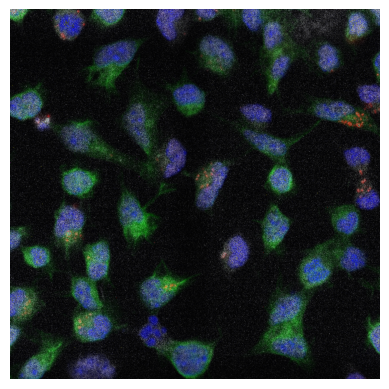

In [3]:
from mug import utils
import tifffile

# load the image
img = tifffile.imread('../data/cells.tif')

# associate channels and indices
channels = {'nuclei':3,'cells':1,'label1':0,'label2':2}

# display the image, indicating the color maps for each channel
utils.imshow(img, ['red','green','gray','blue'], [50,99.99])

In [ ]:
from cellpose import models, core # cell segmentation
model = models.Cellpose(gpu=core.use_gpu(), model_type='cyto2')
mask, flows, styles, diams = model.eval(img[[channels['nuclei'],channels['cells']],:,:], diameter=100, flow_threshold=None, channels=[0,1])

We can represent the segmentation using regionprops and find_contours

(-0.5, 1023.5, 1023.5, -0.5)

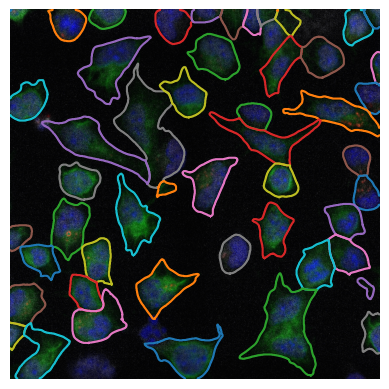

In [11]:
from skimage.measure import regionprops, find_contours
from skimage import morphology
import matplotlib.pyplot as plt

# preprocess the image with labels
signal = morphology.white_tophat(img[channels['label1']], morphology.disk(10))

# measure in regions defined by the mask
props = regionprops(mask, signal)

# filter out small regions
props = [p for p in props if p.area > 500]

# display segmentation as outlines
utils.imshow(img,['red','green','gray','blue'],saturation=[50,100])
for p in props:
    c = find_contours(mask==p.label,0.5)
    plt.plot(c[0][:,1],c[0][:,0])
plt.axis('off')

Let's now extract some relevant measurements from the regionsprops list:

In [6]:
import pandas as pd
tbl = pd.DataFrame({
    'Area [px]': [m.area for m in props],
    'Mean Intenisty': [m.intensity_mean for m in props]
})
tbl.head()

,Area [px],Mean Intenisty
0,2015,71.683871
1,6894,78.095155
2,4297,25.246218
3,7373,28.122881
4,2573,51.191605


Finally, we can look at the distribution of the values extracted for each cell.

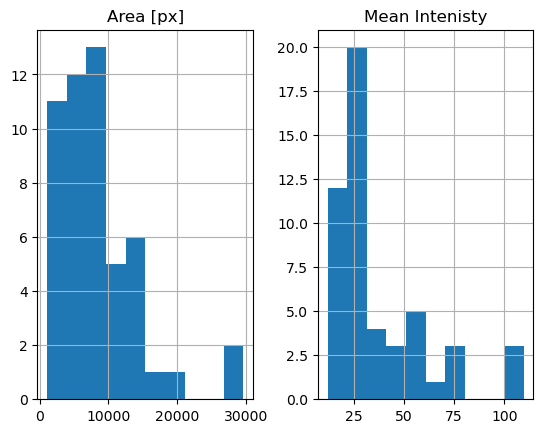

In [7]:
tbl.hist();